19/10. Expériences sur entraînements de réseaux full-rank tronqués et transformés en réseaux low-rank.

A chaque fois, dix réseaux full-rank sont entraînés, puis tronqués et l'accuracy des 10 réseaux tronqués est affichée en fonction du rang.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import pickle
from low_rank_rnns.modules import *
from low_rank_rnns import rdm, romo, raposo, mante, dms, clustering

In [2]:
size = 512
alpha = 0.2
noise_std = 5e-2

# RDM task

In [5]:
x_train, y_train, mask_train, x_val, y_val, mask_val = rdm.generate_rdm_data(1000)

In [10]:
losses = []
accs = []
losses_trunc = {i: [] for i in range(1, 6)}
accs_trunc = {i: [] for i in range(1, 6)}
losses_res = {i: [] for i in range(1, 6)}
accs_res = {i: [] for i in range(1, 6)}
for i in range(10):
    net = FullRankRNN(1, size, 1, noise_std, alpha, rho=0.2)
    J_init = net.wrec.detach().numpy().copy()
    train(net, x_train, y_train, mask_train, 20, lr=1e-4)
    loss, acc = raposo.test(net, x_val, y_val, mask_val)
    losses.append(loss)
    accs.append(acc)
    DJ = net.wrec.detach().numpy() - J_init
    u, s, v = np.linalg.svd(DJ)
    
    # Truncating
    for rank in range(1, 6):
        DJ_new = (u[:, :rank] * s[:rank]) @ v[:rank]
        m = u[:, :rank] * np.sqrt(s[:rank]) * np.sqrt(size)
        n = (v[:rank].T * np.sqrt(s[:rank])) * np.sqrt(size)
        net_trunc = LowRankRNN(1, size, 1, noise_std, alpha, rank=rank, wi_init=net.wi, wo_init=net.wo * size, 
                               m_init=torch.from_numpy(m), n_init=torch.from_numpy(n))
        loss, acc = raposo.test(net_trunc, x_val, y_val, mask_val)
        losses_trunc[rank].append(loss)
        accs_trunc[rank].append(acc)

Training...
initial loss: 0.999
epoch 0:  loss=0.955  (took 1.94 s)
epoch 1:  loss=0.311  (took 1.91 s)
epoch 2:  loss=0.178  (took 1.93 s)
epoch 3:  loss=0.199  (took 2.25 s)
epoch 4:  loss=0.165  (took 2.76 s)
epoch 5:  loss=0.113  (took 2.81 s)
epoch 6:  loss=0.111  (took 2.25 s)
epoch 7:  loss=0.088  (took 2.19 s)
epoch 8:  loss=0.080  (took 2.17 s)
epoch 9:  loss=0.071  (took 2.21 s)
epoch 10:  loss=0.062  (took 2.09 s)
epoch 11:  loss=0.076  (took 2.07 s)
epoch 12:  loss=0.056  (took 2.17 s)
epoch 13:  loss=0.061  (took 2.12 s)
epoch 14:  loss=0.056  (took 2.11 s)
epoch 15:  loss=0.049  (took 2.12 s)
epoch 16:  loss=0.048  (took 2.16 s)
epoch 17:  loss=0.072  (took 2.14 s)
epoch 18:  loss=0.099  (took 2.10 s)
epoch 19:  loss=0.106  (took 2.17 s)
Training...
initial loss: 1.000
epoch 0:  loss=0.951  (took 2.10 s)
epoch 1:  loss=0.325  (took 2.17 s)
epoch 2:  loss=0.209  (took 2.16 s)
epoch 3:  loss=0.187  (took 2.16 s)
epoch 4:  loss=0.172  (took 2.18 s)
epoch 5:  loss=0.159  (too

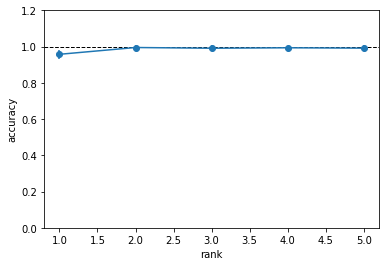

In [11]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_trunc.keys())
ax.errorbar(keys, [np.mean(accs_trunc[r]) for r in keys], marker='o', yerr=[np.std(accs_trunc[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(1, c='k', zorder=-10, lw=1, ls='--')

# Romo task

In [37]:
x_train, y_train, mask_train, x_val, y_val, mask_val = romo.generate_data(1000)

In [42]:
losses = []
accs = []
losses_trunc = {i: [] for i in range(1, 6)}
accs_trunc = {i: [] for i in range(1, 6)}
losses_res = {i: [] for i in range(1, 6)}
accs_res = {i: [] for i in range(1, 6)}
for i in range(10):
    net = FullRankRNN(1, size, 1, noise_std, alpha, rho=0.2)
    J_init = net.wrec.detach().numpy().copy()
    train(net, x_train, y_train, mask_train, 50, lr=1e-4, keep_best=True)
    loss, acc = romo.test_romo(net, x_val, y_val, mask_val)
    losses.append(loss)
    accs.append(acc)
    DJ = net.wrec.detach().numpy() - J_init
    u, s, v = np.linalg.svd(DJ)
    
    # Truncating
    for rank in range(1, 6):
        DJ_new = (u[:, :rank] * s[:rank]) @ v[:rank]
        m = u[:, :rank] * np.sqrt(s[:rank]) * np.sqrt(size)
        n = (v[:rank].T * np.sqrt(s[:rank])) * np.sqrt(size)
        net_trunc = LowRankRNN(1, size, 1, noise_std, alpha, rank=rank, wi_init=net.wi, wo_init=net.wo * size, 
                               m_init=torch.from_numpy(m), n_init=torch.from_numpy(n))
        loss, acc = romo.test_romo(net_trunc, x_val, y_val, mask_val)
        losses_trunc[rank].append(loss)
        accs_trunc[rank].append(acc)

Training...
initial loss: 0.261
epoch 0:  loss=0.216  (took 3.02 s) *
epoch 1:  loss=0.152  (took 3.02 s) *
epoch 2:  loss=0.099  (took 3.17 s) *
epoch 3:  loss=0.089  (took 3.40 s) *
epoch 4:  loss=0.088  (took 3.33 s) *
epoch 5:  loss=0.084  (took 3.37 s) *
epoch 6:  loss=0.085  (took 3.34 s)
epoch 7:  loss=0.076  (took 3.40 s) *
epoch 8:  loss=0.082  (took 3.41 s)
epoch 9:  loss=0.083  (took 3.34 s)
epoch 10:  loss=0.078  (took 3.46 s)
epoch 11:  loss=0.077  (took 3.35 s)
epoch 12:  loss=0.075  (took 3.41 s) *
epoch 13:  loss=0.074  (took 3.36 s) *
epoch 14:  loss=0.075  (took 3.49 s)
epoch 15:  loss=0.063  (took 3.42 s) *
epoch 16:  loss=0.050  (took 3.48 s) *
epoch 17:  loss=0.064  (took 3.39 s)
epoch 18:  loss=0.054  (took 3.48 s)
epoch 19:  loss=0.031  (took 3.46 s) *
epoch 20:  loss=0.021  (took 3.41 s) *
epoch 21:  loss=0.020  (took 3.48 s) *
epoch 22:  loss=0.020  (took 3.49 s)
epoch 23:  loss=0.019  (took 3.47 s) *
epoch 24:  loss=0.018  (took 3.51 s) *
epoch 25:  loss=0.020

epoch 14:  loss=0.086  (took 3.28 s)
epoch 15:  loss=0.082  (took 3.37 s)
epoch 16:  loss=0.074  (took 3.37 s)
epoch 17:  loss=0.065  (took 3.30 s) *
epoch 18:  loss=0.054  (took 3.35 s) *
epoch 19:  loss=0.055  (took 3.37 s)
epoch 20:  loss=0.047  (took 3.31 s) *
epoch 21:  loss=0.041  (took 3.32 s) *
epoch 22:  loss=0.043  (took 3.34 s)
epoch 23:  loss=0.041  (took 3.33 s)
epoch 24:  loss=0.038  (took 3.34 s) *
epoch 25:  loss=0.070  (took 3.37 s)
epoch 26:  loss=0.043  (took 3.29 s)
epoch 27:  loss=0.032  (took 3.37 s) *
epoch 28:  loss=0.024  (took 3.38 s) *
epoch 29:  loss=0.022  (took 3.30 s) *
epoch 30:  loss=0.022  (took 3.37 s) *
epoch 31:  loss=0.023  (took 3.34 s)
epoch 32:  loss=0.023  (took 3.31 s)
epoch 33:  loss=0.023  (took 3.37 s)
epoch 34:  loss=0.019  (took 3.34 s) *
epoch 35:  loss=0.020  (took 3.33 s)
epoch 36:  loss=0.021  (took 3.37 s)
epoch 37:  loss=0.021  (took 3.33 s)
epoch 38:  loss=0.018  (took 3.36 s) *
epoch 39:  loss=0.018  (took 3.37 s) *
epoch 40:  los

epoch 29:  loss=0.088  (took 3.36 s)
epoch 30:  loss=0.079  (took 3.33 s)
epoch 31:  loss=0.074  (took 3.36 s)
epoch 32:  loss=0.079  (took 3.39 s)
epoch 33:  loss=0.042  (took 3.30 s) *
epoch 34:  loss=0.023  (took 3.33 s) *
epoch 35:  loss=0.020  (took 3.37 s) *
epoch 36:  loss=0.021  (took 3.30 s)
epoch 37:  loss=0.020  (took 3.39 s) *
epoch 38:  loss=0.023  (took 3.36 s)
epoch 39:  loss=0.022  (took 3.28 s)
epoch 40:  loss=0.020  (took 3.36 s) *
epoch 41:  loss=0.018  (took 3.34 s) *
epoch 42:  loss=0.018  (took 3.33 s) *
epoch 43:  loss=0.018  (took 3.37 s)
epoch 44:  loss=0.017  (took 3.32 s) *
epoch 45:  loss=0.018  (took 3.35 s)
epoch 46:  loss=0.017  (took 3.33 s) *
epoch 47:  loss=0.018  (took 3.32 s)
epoch 48:  loss=0.019  (took 3.36 s)
epoch 49:  loss=0.018  (took 3.38 s)
Training...
initial loss: 0.260
epoch 0:  loss=0.227  (took 3.38 s) *
epoch 1:  loss=0.157  (took 3.32 s) *
epoch 2:  loss=0.102  (took 3.37 s) *
epoch 3:  loss=0.093  (took 3.36 s) *
epoch 4:  loss=0.085 

In [46]:
accs

[1.0,
 1.0,
 0.8999999761581421,
 0.8650000095367432,
 1.0,
 0.9950000047683716,
 1.0,
 0.9399999976158142,
 1.0,
 0.8700000047683716]

In [45]:
np.mean(accs)

0.9569999992847442

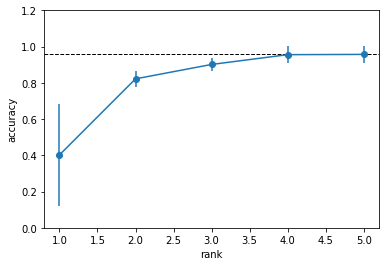

In [47]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_trunc.keys())
ax.errorbar(keys, [np.mean(accs_trunc[r]) for r in keys], marker='o', yerr=[np.std(accs_trunc[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(np.mean(accs), c='k', zorder=-10, lw=1, ls='--')

# Raposo task

In [21]:
x_train, y_train, mask_train, x_val, y_val, mask_val = raposo.generate_data(1000)

In [22]:
losses = []
accs = []
losses_trunc = {i: [] for i in range(1, 6)}
accs_trunc = {i: [] for i in range(1, 6)}
losses_res = {i: [] for i in range(1, 6)}
accs_res = {i: [] for i in range(1, 6)}
for i in range(10):
    net = FullRankRNN(2, size, 1, noise_std, alpha, train_wi=True, rho=0.2)
    J_init = net.wrec.detach().numpy().copy()
    train(net, x_train, y_train, mask_train, 20, lr=1e-3)
    loss, acc = raposo.test(net, x_val, y_val, mask_val)
    losses.append(loss)
    accs.append(acc)
    DJ = net.wrec.detach().numpy() - J_init
    u, s, v = np.linalg.svd(DJ)
    
    # Truncating
    for rank in range(1, 6):
        DJ_new = (u[:, :rank] * s[:rank]) @ v[:rank]
        m = u[:, :rank] * np.sqrt(s[:rank]) * np.sqrt(size)
        n = (v[:rank].T * np.sqrt(s[:rank])) * np.sqrt(size)
        net_trunc = LowRankRNN(2, size, 1, noise_std, alpha, rank=rank, wi_init=net.wi, wo_init=net.wo * size, 
                               m_init=torch.from_numpy(m), n_init=torch.from_numpy(n))
        loss, acc = raposo.test(net_trunc, x_val, y_val, mask_val)
        losses_trunc[rank].append(loss)
        accs_trunc[rank].append(acc)
        
        # Resampling
        net_res = clustering.to_support_net(net_trunc, np.zeros(size))
        losses_cur = []
        accs_cur = []
        for i in range(10):
            net_res.resample_basis()
            loss, acc = raposo.test(net_res, x_val, y_val, mask_val)
            losses_cur.append(loss)
            accs_cur.append(acc)
        losses_res[rank].append(losses_cur)
        accs_res[rank].append(accs_cur)

Training...
initial loss: 1.004
epoch 0:  loss=0.349  (took 1.99 s)
epoch 1:  loss=0.163  (took 1.95 s)
epoch 2:  loss=0.132  (took 2.06 s)
epoch 3:  loss=0.102  (took 2.14 s)
epoch 4:  loss=0.039  (took 2.37 s)
epoch 5:  loss=0.025  (took 2.29 s)
epoch 6:  loss=0.019  (took 2.41 s)
epoch 7:  loss=0.463  (took 2.70 s)
epoch 8:  loss=0.425  (took 2.36 s)
epoch 9:  loss=0.186  (took 2.43 s)
epoch 10:  loss=0.147  (took 2.39 s)
epoch 11:  loss=0.123  (took 2.24 s)
epoch 12:  loss=0.108  (took 2.23 s)
epoch 13:  loss=0.092  (took 2.64 s)
epoch 14:  loss=0.077  (took 2.50 s)
epoch 15:  loss=0.063  (took 2.61 s)
epoch 16:  loss=0.052  (took 2.47 s)
epoch 17:  loss=0.045  (took 2.15 s)
epoch 18:  loss=0.038  (took 2.14 s)
epoch 19:  loss=0.032  (took 2.19 s)
epoch 20:  loss=0.027  (took 2.44 s)
epoch 21:  loss=0.022  (took 2.29 s)
epoch 22:  loss=0.018  (took 2.17 s)
epoch 23:  loss=0.016  (took 2.27 s)
epoch 24:  loss=0.013  (took 2.23 s)
epoch 25:  loss=0.011  (took 2.70 s)
epoch 26:  loss=

epoch 7:  loss=0.037  (took 2.40 s)
epoch 8:  loss=0.018  (took 2.26 s)
epoch 9:  loss=0.012  (took 2.24 s)
epoch 10:  loss=0.009  (took 2.26 s)
epoch 11:  loss=0.006  (took 2.20 s)
epoch 12:  loss=0.004  (took 2.95 s)
epoch 13:  loss=0.003  (took 2.69 s)
epoch 14:  loss=0.002  (took 2.31 s)
epoch 15:  loss=0.001  (took 2.28 s)
epoch 16:  loss=0.001  (took 2.27 s)
epoch 17:  loss=0.000  (took 2.18 s)
epoch 18:  loss=0.008  (took 2.18 s)
epoch 19:  loss=0.025  (took 2.54 s)
epoch 20:  loss=0.001  (took 2.88 s)
epoch 21:  loss=0.000  (took 2.54 s)
epoch 22:  loss=0.000  (took 3.48 s)
epoch 23:  loss=0.000  (took 3.15 s)
epoch 24:  loss=0.000  (took 2.23 s)
epoch 25:  loss=0.000  (took 2.33 s)
epoch 26:  loss=0.000  (took 2.46 s)
epoch 27:  loss=0.000  (took 2.25 s)
epoch 28:  loss=0.000  (took 2.38 s)
epoch 29:  loss=0.000  (took 2.36 s)
Training...
initial loss: 0.991
epoch 0:  loss=0.346  (took 2.21 s)
epoch 1:  loss=0.372  (took 2.19 s)
epoch 2:  loss=0.115  (took 2.25 s)
epoch 3:  lo

In [15]:
accs_trunc.items()

dict_items([(1, [1.0, 1.0, 1.0, 0.9900000095367432, 1.0, 1.0, 1.0, 0.9900000095367432, 1.0, 0.9900000095367432]), (2, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (3, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (4, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), (5, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])])

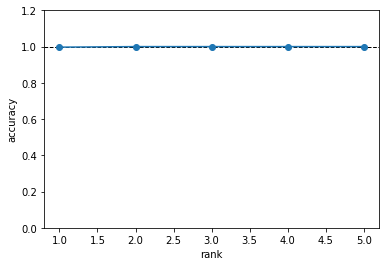

In [25]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_trunc.keys())
ax.errorbar(keys, [np.mean(accs_trunc[r]) for r in keys], marker='o', yerr=[np.std(accs_trunc[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(1, c='k', zorder=-10, lw=1, ls='--')

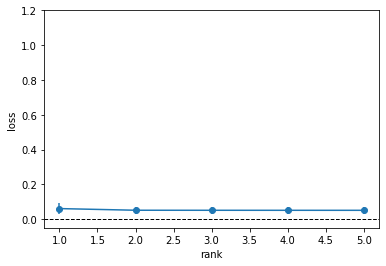

In [29]:
fig, ax = plt.subplots(1, 1)
keys = sorted(losses_trunc.keys())
ax.errorbar(keys, [np.mean(losses_trunc[r]) for r in keys], marker='o', yerr=[np.std(losses_trunc[r]) for r in keys])
ax.set_ylim(-0.05, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('loss')
ax.axhline(np.mean(losses), c='k', zorder=-10, lw=1, ls='--')

In [28]:
np.mean(losses)

0.0008079344348516315

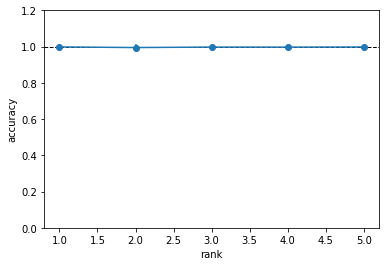

In [32]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_res.keys())
ax.errorbar(keys, [np.mean(accs_res[r]) for r in keys], marker='o', yerr=[np.std(accs_res[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(1, c='k', zorder=-10, lw=1, ls='--')

In [31]:
np.mean(accs_res[1])

0.9982500010728836

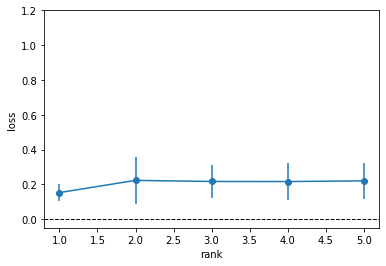

In [33]:
fig, ax = plt.subplots(1, 1)
keys = sorted(losses_res.keys())
ax.errorbar(keys, [np.mean(losses_res[r]) for r in keys], marker='o', yerr=[np.std(losses_res[r]) for r in keys])
ax.set_ylim(-0.05, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('loss')
ax.axhline(np.mean(losses), c='k', zorder=-10, lw=1, ls='--')

# Mante

In [69]:
x_train, y_train, mask_train, x_val, y_val, mask_val, _ = mante.generate_mante_data(1000, fraction_validation_trials=.2)

In [73]:
losses = []
accs = []
max_rank = 10
losses_trunc = {i: [] for i in range(1, max_rank)}
accs_trunc = {i: [] for i in range(1, max_rank)}
losses_res = {i: [] for i in range(1, max_rank)}
accs_res = {i: [] for i in range(1, max_rank)}
for i in range(10):
    net = FullRankRNN(4, size, 1, noise_std, alpha, train_wi=True, rho=0.2)
    J_init = net.wrec.detach().numpy().copy()
    train(net, x_train, y_train, mask_train, 40, lr=1e-3, clip_gradient=1, keep_best=True)
    loss, acc = raposo.test(net, x_val, y_val, mask_val)
    losses.append(loss)
    accs.append(acc)
    DJ = net.wrec.detach().numpy() - J_init
    u, s, v = np.linalg.svd(DJ)
    
    # Truncating
    for rank in range(1, max_rank):
        DJ_new = (u[:, :rank] * s[:rank]) @ v[:rank]
        m = u[:, :rank] * np.sqrt(s[:rank]) * np.sqrt(size)
        n = (v[:rank].T * np.sqrt(s[:rank])) * np.sqrt(size)
        net_trunc = LowRankRNN(4, size, 1, noise_std, alpha, rank=rank, wi_init=net.wi, wo_init=net.wo * size, 
                               m_init=torch.from_numpy(m), n_init=torch.from_numpy(n))
        loss, acc = raposo.test(net_trunc, x_val, y_val, mask_val)
        losses_trunc[rank].append(loss)
        accs_trunc[rank].append(acc)
        
        # Resampling
        net_res = clustering.to_support_net(net_trunc, np.zeros(size))
        losses_cur = []
        accs_cur = []
        for i in range(10):
            net_res.resample_basis()
            loss, acc = raposo.test(net_res, x_val, y_val, mask_val)
            losses_cur.append(loss)
            accs_cur.append(acc)
        losses_res[rank].append(losses_cur)
        accs_res[rank].append(accs_cur)

Training...
initial loss: 0.999
epoch 0:  loss=0.651  (took 2.18 s) *
epoch 1:  loss=0.380  (took 2.41 s) *
epoch 2:  loss=0.213  (took 2.19 s) *
epoch 3:  loss=0.399  (took 2.44 s)
epoch 4:  loss=0.267  (took 2.48 s)
epoch 5:  loss=0.167  (took 2.44 s) *
epoch 6:  loss=0.240  (took 2.43 s)
epoch 7:  loss=0.292  (took 2.49 s)
epoch 8:  loss=0.077  (took 2.44 s) *
epoch 9:  loss=0.076  (took 2.40 s) *
epoch 10:  loss=0.211  (took 2.41 s)
epoch 11:  loss=0.192  (took 2.45 s)
epoch 12:  loss=0.078  (took 2.44 s)
epoch 13:  loss=0.146  (took 2.38 s)
epoch 14:  loss=0.117  (took 2.43 s)
epoch 15:  loss=0.188  (took 2.55 s)
epoch 16:  loss=0.256  (took 2.43 s)
epoch 17:  loss=0.122  (took 2.49 s)
epoch 18:  loss=0.385  (took 2.51 s)
epoch 19:  loss=0.198  (took 2.46 s)
epoch 20:  loss=0.099  (took 2.47 s)
epoch 21:  loss=0.126  (took 2.49 s)
epoch 22:  loss=0.124  (took 2.52 s)
epoch 23:  loss=0.461  (took 2.46 s)
epoch 24:  loss=0.579  (took 2.52 s)
epoch 25:  loss=0.335  (took 2.57 s)
epoc

epoch 16:  loss=0.486  (took 2.51 s)
epoch 17:  loss=0.510  (took 2.49 s)
epoch 18:  loss=0.570  (took 2.67 s)
epoch 19:  loss=0.397  (took 2.55 s)
epoch 20:  loss=0.332  (took 2.44 s) *
epoch 21:  loss=0.220  (took 2.46 s) *
epoch 22:  loss=0.171  (took 2.45 s) *
epoch 23:  loss=0.190  (took 2.53 s)
epoch 24:  loss=0.146  (took 2.60 s) *
epoch 25:  loss=0.063  (took 2.73 s) *
epoch 26:  loss=0.075  (took 2.62 s)
epoch 27:  loss=0.131  (took 2.49 s)
epoch 28:  loss=0.234  (took 2.44 s)
epoch 29:  loss=0.204  (took 2.58 s)
epoch 30:  loss=0.200  (took 3.00 s)
epoch 31:  loss=0.093  (took 2.46 s)
epoch 32:  loss=0.052  (took 2.50 s) *
epoch 33:  loss=0.097  (took 2.51 s)
epoch 34:  loss=0.041  (took 2.70 s) *
epoch 35:  loss=0.028  (took 2.51 s) *
epoch 36:  loss=0.004  (took 2.54 s) *
epoch 37:  loss=0.006  (took 2.57 s)
epoch 38:  loss=0.001  (took 2.54 s) *
epoch 39:  loss=0.005  (took 2.51 s)
Training...
initial loss: 1.000
epoch 0:  loss=0.756  (took 2.49 s) *
epoch 1:  loss=0.493  

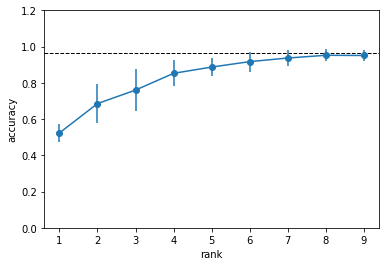

In [74]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_trunc.keys())
ax.errorbar(keys, [np.mean(accs_trunc[r]) for r in keys], marker='o', yerr=[np.std(accs_trunc[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(np.mean(accs), c='k', zorder=-10, lw=1, ls='--')

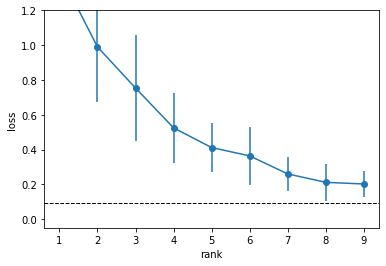

In [75]:
fig, ax = plt.subplots(1, 1)
keys = sorted(losses_trunc.keys())
ax.errorbar(keys, [np.mean(losses_trunc[r]) for r in keys], marker='o', yerr=[np.std(losses_trunc[r]) for r in keys])
ax.set_ylim(-0.05, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('loss')
ax.axhline(np.mean(losses), c='k', zorder=-10, lw=1, ls='--')

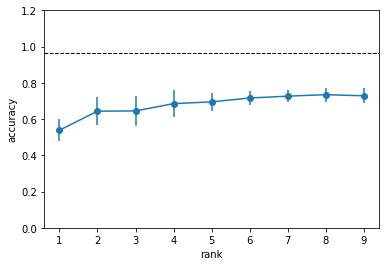

In [76]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_res.keys())
ax.errorbar(keys, [np.mean(accs_res[r]) for r in keys], marker='o', yerr=[np.std(accs_res[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(np.mean(accs), c='k', zorder=-10, lw=1, ls='--')

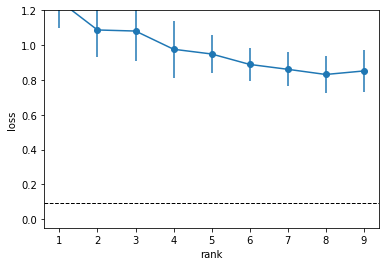

In [77]:
fig, ax = plt.subplots(1, 1)
keys = sorted(losses_res.keys())
ax.errorbar(keys, [np.mean(losses_res[r]) for r in keys], marker='o', yerr=[np.std(losses_res[r]) for r in keys])
ax.set_ylim(-0.05, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('loss')
ax.axhline(np.mean(losses), c='k', zorder=-10, lw=1, ls='--')

# DMS

In [78]:
# x_train, y_train, mask_train, x_val, y_val, mask_val = dms.generate_dms_data(1000, fraction_validation_trials=.2)

In [79]:
# losses = []
# accs = []
# losses_trunc = {i: [] for i in range(1, 6)}
# accs_trunc = {i: [] for i in range(1, 6)}
# losses_res = {i: [] for i in range(1, 6)}
# accs_res = {i: [] for i in range(1, 6)}
# for i in range(10):
#     net = FullRankRNN(2, 1024, 1, noise_std, alpha, rho=0.2)
#     J_init = net.wrec.detach().numpy().copy()
#     train(net, x_train, y_train, mask_train, 50, lr=1e-5, batch_size=128, keep_best=True)
#     loss, acc = dms.test_dms(net, x_val, y_val, mask_val)
#     losses.append(loss)
#     accs.append(acc)
#     DJ = net.wrec.detach().numpy() - J_init
#     u, s, v = np.linalg.svd(DJ)
    
#     # Truncating
#     for rank in range(1, 6):
#         DJ_new = (u[:, :rank] * s[:rank]) @ v[:rank]
#         m = u[:, :rank] * np.sqrt(s[:rank]) * np.sqrt(size)
#         n = (v[:rank].T * np.sqrt(s[:rank])) * np.sqrt(size)
#         net_trunc = LowRankRNN(2, size, 1, noise_std, alpha, rank=rank, wi_init=net.wi, wo_init=net.wo * size, 
#                                m_init=torch.from_numpy(m), n_init=torch.from_numpy(n))
#         loss, acc = dms.test_dms(net_trunc, x_val, y_val, mask_val)
#         losses_trunc[rank].append(loss)
#         accs_trunc[rank].append(acc)

In [5]:
with open('../data/si_fr_dms_res.pkl', 'rb') as f:
    data = pickle.load(f)
losses = data[0]
accs = data[1]
losses_trunc = data[2]
accs_trunc = data[3]

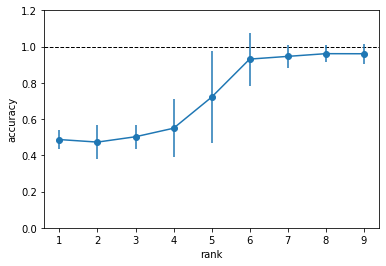

In [6]:
fig, ax = plt.subplots(1, 1)
keys = sorted(accs_trunc.keys())
ax.errorbar(keys, [np.mean(accs_trunc[r]) for r in keys], marker='o', yerr=[np.std(accs_trunc[r]) for r in keys])
ax.set_ylim(0, 1.2)
ax.set_xlabel('rank')
ax.set_ylabel('accuracy')
ax.axhline(np.mean(accs), c='k', zorder=-10, lw=1, ls='--')